In [53]:
import pandas as pd
import numpy as np
import math
import pandas_datareader as pdr
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [33]:
apikey = '2c73158d3c325303b3b9bd4598c96412ff07b01a'

In [34]:
df = pdr.get_data_tiingo('AAPL',api_key=apikey)

In [35]:
df.to_csv('AAPL.csv')
df = pd.read_csv('AAPL.csv')
df1=df.reset_index()['close']

In [36]:
df1.shape

(1258,)

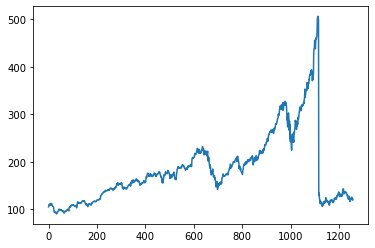

In [37]:
plt.plot(df1)

In [38]:
# For LSTM we need to scale the data always
scaler = MinMaxScaler(feature_range=(0,1))
df1 = scaler.fit_transform(np.array(df1).reshape(-1,1))
df1

array([[0.03571858],
       [0.04170776],
       [0.04622971],
       ...,
       [0.07949489],
       [0.07745039],
       [0.07155743]])

In [39]:
training_size = int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:]
train_data,test_data

(array([[0.03571858],
        [0.04170776],
        [0.04622971],
        [0.04485869],
        [0.04726398],
        [0.04998196],
        [0.04683103],
        [0.04959711],
        [0.04377631],
        [0.04406494],
        [0.04493085],
        [0.04834636],
        [0.05219483],
        [0.05233915],
        [0.04692724],
        [0.0412267 ],
        [0.03985568],
        [0.04038485],
        [0.03759471],
        [0.03689717],
        [0.035454  ],
        [0.03369814],
        [0.01799158],
        [0.01079976],
        [0.00817799],
        [0.00793746],
        [0.01164161],
        [0.00926037],
        [0.00697535],
        [0.00572459],
        [0.00589296],
        [0.0074083 ],
        [0.00521948],
        [0.        ],
        [0.00043295],
        [0.00851473],
        [0.00757667],
        [0.01015033],
        [0.00928443],
        [0.01173782],
        [0.01464823],
        [0.018184  ],
        [0.02232111],
        [0.02422129],
        [0.02407697],
        [0

In [40]:
def create_dataset(dataset,time_step=1):
    dataX,dataY=[],[]
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step),0]
        dataX.append(a)
        dataY.append(dataset[i+time_step,0])
    return np.array(dataX),np.array(dataY)

In [41]:
time_step = 100
X_train,y_train = create_dataset(train_data,time_step)
X_test,y_test = create_dataset(test_data,time_step)

In [42]:
X_train,y_train,X_test,y_test

(array([[0.03571858, 0.04170776, 0.04622971, ..., 0.0429104 , 0.04603728,
         0.04579675],
        [0.04170776, 0.04622971, 0.04485869, ..., 0.04603728, 0.04579675,
         0.04541191],
        [0.04622971, 0.04485869, 0.04726398, ..., 0.04579675, 0.04541191,
         0.04507517],
        ...,
        [0.16216476, 0.15865304, 0.15475646, ..., 0.24630186, 0.24906795,
         0.26003608],
        [0.15865304, 0.15475646, 0.1801804 , ..., 0.24906795, 0.26003608,
         0.25864101],
        [0.15475646, 0.1801804 , 0.18304269, ..., 0.26003608, 0.25864101,
         0.26246542]]),
 array([0.04541191, 0.04507517, 0.04574865, 0.04370415, 0.04452195,
        0.04254961, 0.04144317, 0.03992784, 0.03963921, 0.03766687,
        0.0379074 , 0.03942273, 0.04182802, 0.04175586, 0.04334336,
        0.03651233, 0.03076368, 0.0363199 , 0.04235719, 0.0515454 ,
        0.06068551, 0.05912207, 0.05589898, 0.05587492, 0.05582682,
        0.05840048, 0.05380637, 0.05421527, 0.05472038, 0.05678894,
 

In [43]:
### FOR LSTM we need to convert data into 3 dimensions
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1],1)

In [44]:
from tensorflow.keras.layers import Dense,LSTM
from tensorflow.keras.models import Sequential

In [45]:
model =Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [46]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 100, 50)           10400     
_________________________________________________________________
lstm_4 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_5 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [47]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
12/12 [==============================] - 3s 246ms/step - loss: 0.0099 - val_loss: 0.0473
Epoch 2/100
12/12 [==============================] - 2s 163ms/step - loss: 0.0019 - val_loss: 0.0251
Epoch 3/100
12/12 [==============================] - 2s 161ms/step - loss: 8.5756e-04 - val_loss: 0.0215
Epoch 4/100
12/12 [==============================] - 2s 165ms/step - loss: 4.7084e-04 - val_loss: 0.0208
Epoch 5/100
12/12 [==============================] - 2s 169ms/step - loss: 4.5160e-04 - val_loss: 0.0203
Epoch 6/100
12/12 [==============================] - 2s 159ms/step - loss: 4.1146e-04 - val_loss: 0.0195
Epoch 7/100
12/12 [==============================] - 2s 155ms/step - loss: 3.9789e-04 - val_loss: 0.0191
Epoch 8/100
12/12 [==============================] - 2s 158ms/step - loss: 3.9430e-04 - val_loss: 0.0187
Epoch 9/100
12/12 [==============================] - 2s 156ms/step - loss: 3.8850e-04 - val_loss: 0.0180
Epoch 10/100
12/12 [==============================] - 2s 161ms/

12/12 [==============================] - 2s 157ms/step - loss: 1.4573e-04 - val_loss: 0.0063
Epoch 79/100
12/12 [==============================] - 2s 160ms/step - loss: 1.5408e-04 - val_loss: 0.0061
Epoch 80/100
12/12 [==============================] - 2s 159ms/step - loss: 1.3285e-04 - val_loss: 0.0064
Epoch 81/100
12/12 [==============================] - 2s 165ms/step - loss: 1.0477e-04 - val_loss: 0.0064
Epoch 82/100
12/12 [==============================] - 2s 162ms/step - loss: 1.0708e-04 - val_loss: 0.0059
Epoch 83/100
12/12 [==============================] - 2s 158ms/step - loss: 9.7928e-05 - val_loss: 0.0058
Epoch 84/100
12/12 [==============================] - 2s 159ms/step - loss: 1.0243e-04 - val_loss: 0.0059
Epoch 85/100
12/12 [==============================] - 2s 159ms/step - loss: 1.0600e-04 - val_loss: 0.0070
Epoch 86/100
12/12 [==============================] - 2s 160ms/step - loss: 1.2910e-04 - val_loss: 0.0058
Epoch 87/100
12/12 [==============================] - 2s 15

In [54]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

In [55]:
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

In [56]:
math.sqrt(mean_squared_error(y_train,train_predict))

168.1751386341515

In [57]:
math.sqrt(mean_squared_error(y_test,test_predict))

262.1790865353108

In [58]:
look_back = 100
trainPredictPlot = nupy.empty_like(df1)
trainPredictPlot[:,:]=np.nan
trainPredictPlot[look_back:len(train_predict)+look_back,:] =train_predict

testPredictPlot = nupy.empty_like(df1)
testPredictPlot[:,:]=np.nan
testPredictPlot[len(train_predict)+ (2* look_back) +1:len(df1)-1,:] =test_predict
plt.plot(scaler.inverse_transform(df1))
plt.plot(testPredictPlot)
plt.plot(trainPredictPlot)
plt.shoq()

NameError: name 'nupy' is not defined